In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [4]:
df_data=pd.DataFrame(boston.data,columns=boston.feature_names)
df_target=pd.DataFrame(boston.target,columns=['MEDV'])
df=pd.concat([df_data,df_target],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
lstat=df.loc[:,['LSTAT']].values
rm=df.loc[:,['RM']].values
y=df.loc[:,['MEDV']].values

In [11]:
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

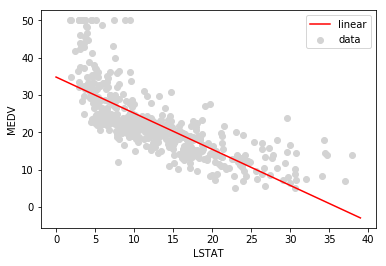

In [14]:
plt.scatter(lstat,y,color='lightgray',label='data')
x=np.arange(0,40,1)[:,np.newaxis]
plt.plot(x, model_lin.predict(x), color='red', label='linear')
plt.xlabel('LSTAT')                                            
plt.ylabel('MEDV')                                             
plt.legend(loc = 'upper right')                               
plt.show()    

In [15]:
from sklearn.preprocessing import PolynomialFeatures
quad=PolynomialFeatures(degree=2)
lstat_quad=quad.fit_transform(lstat)
lstat_quad

array([[  1.    ,   4.98  ,  24.8004],
       [  1.    ,   9.14  ,  83.5396],
       [  1.    ,   4.03  ,  16.2409],
       ..., 
       [  1.    ,   5.64  ,  31.8096],
       [  1.    ,   6.48  ,  41.9904],
       [  1.    ,   7.88  ,  62.0944]])

In [17]:
lstat_quad_train,lstat_quad_test,_,_=train_test_split(lstat_quad,y,test_size=0.3,random_state=0)

In [18]:
model_quad=LinearRegression()
model_quad.fit(lstat_quad_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

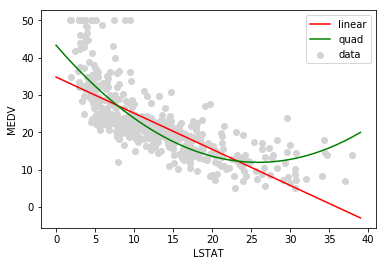

In [20]:
plt.scatter(lstat,y,color='lightgray',label='data')
plt.plot(x,model_lin.predict(x),color='red',label='linear')
x_quad=quad.fit_transform(x)
plt.plot(x,model_quad.predict(x_quad),color='green',label='quad')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

In [23]:
cubic=PolynomialFeatures(degree=3)
lstat_cubic=cubic.fit_transform(lstat)
lstat_cubic

array([[   1.      ,    4.98    ,   24.8004  ,  123.505992],
       [   1.      ,    9.14    ,   83.5396  ,  763.551944],
       [   1.      ,    4.03    ,   16.2409  ,   65.450827],
       ..., 
       [   1.      ,    5.64    ,   31.8096  ,  179.406144],
       [   1.      ,    6.48    ,   41.9904  ,  272.097792],
       [   1.      ,    7.88    ,   62.0944  ,  489.303872]])

In [27]:
lstat_cubic_train,lstat_cubic_test,_,_=train_test_split(lstat_cubic,y,test_size=0.3,random_state=0)

In [28]:
model_cubic=LinearRegression()
model_cubic.fit(lstat_cubic_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

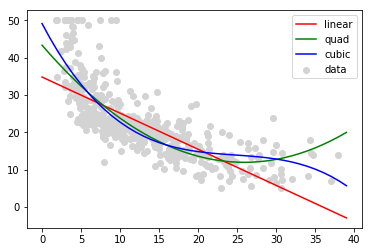

In [32]:
plt.scatter(lstat,y,color='lightgray',label='data')
plt.plot(x,model_lin.predict(x),color='red',label='linear')
plt.plot(x,model_quad.predict(x_quad),color='green',label='quad')
x_cubic=cubic.fit_transform(x)
plt.plot(x,model_cubic.predict(x_cubic),color='blue',label='cubic')
plt.xlabel=('LSTAT')
plt.ylabel=('MEDV')
plt.legend(loc='upper right')
plt.show()

In [33]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [34]:
print('adjusted R^2')
print('')
print('model_linear')
print('train: %.3f' % adjusted(model_lin.score(lstat_train, y_train), len(y_train), 1))
print('test : %.3f' % adjusted(model_lin.score(lstat_test, y_test), len(y_test), 1))
print('')
print('model_quad')
print('train: %.3f' % adjusted(model_quad.score(lstat_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_quad.score(lstat_quad_test, y_test), len(y_test), 2))
print('')
print('model_cubic')
print('train: %.3f' % adjusted(model_cubic.score(lstat_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic.score(lstat_cubic_test, y_test), len(y_test), 3))

adjusted R^2

model_linear
train: 0.551
test : 0.519

model_quad
train: 0.656
test : 0.591

model_cubic
train: 0.672
test : 0.607


In [35]:
X_lin=np.hstack(())

In [36]:
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
model_lin_2 = LinearRegression()
model_lin_2.fit(X_lin_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
X_quad = np.hstack((lstat_quad, rm))

In [38]:
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
model_quad_2 = LinearRegression()
model_quad_2.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
X_cubic = np.hstack((lstat_cubic, rm))

In [40]:
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
model_cubic_2 = LinearRegression()
model_cubic_2.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_2')
print('train: %.3f' % adjusted(model_lin_2.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_2.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_2')
print('train: %.3f' % adjusted(model_quad_2.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_2.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_2')
print('train: %.3f' % adjusted(model_cubic_2.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_2.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_2
train: 0.649
test : 0.602

model_quad_2
train: 0.726
test : 0.630

model_cubic_2
train: 0.728
test : 0.628


In [54]:
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

TypeError: 'str' object is not callable

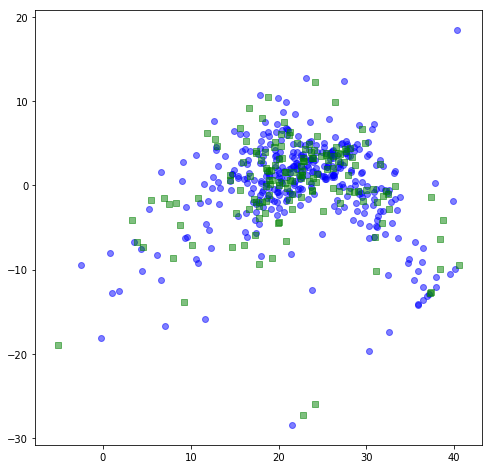

In [55]:
res_plot(y_train, model_lin_2.predict(X_lin_train), y_test, model_lin_2.predict(X_lin_test))

TypeError: 'str' object is not callable

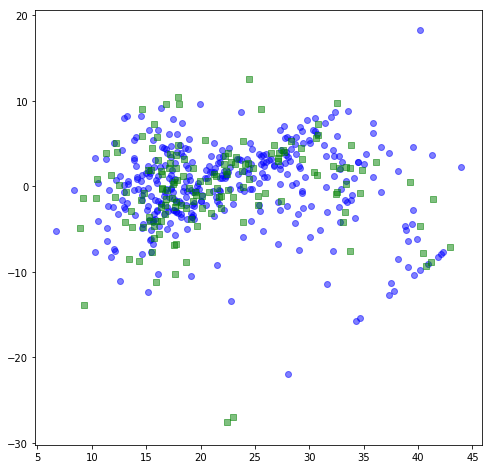

In [53]:
res_plot(y_train, model_cubic_2.predict(X_cubic_train), y_test, model_cubic_2.predict(X_cubic_test))